In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

df = pd.read_csv('samples_nylonGuitar_1024_Mm7_R03.csv')

X_load = np.array(df.iloc[:,:-1], dtype=np.float)
y_load = np.array(df.iloc[:,-1], dtype=np.float)

In [3]:
import librosa

sample = librosa.core.stft(y=X_load[0], n_fft=511, win_length=128, window='hamming', center=True, dtype=np.float, pad_mode='reflect')


print(sample)
print(sample.shape)
print(y_load[0])
# sample = np.append(y[0],sample)
# print(sample)
# print(sample.shape)

[[ -6.39527930e-01  -2.99984284e-01  -1.99144017e-01 ...,  -3.79785584e-01
    1.55735146e+00   1.32092199e+00]
 [  6.47312035e-01   2.72246677e-01   1.65022321e-01 ...,   3.99066443e-01
   -1.55737417e+00  -1.31435295e+00]
 [ -6.69314426e-01  -1.92042848e-01  -7.51026342e-02 ...,  -4.43192285e-01
    1.54343824e+00   1.29305338e+00]
 ..., 
 [  1.22952605e-03   1.11064913e-03   1.66377247e-03 ...,  -2.71162070e-03
    3.23515689e-03  -2.72014303e-03]
 [ -1.24189394e-03  -1.24683184e-03  -1.68020744e-03 ...,   2.71529323e-03
   -3.24399965e-03   2.44418021e-03]
 [  5.16070895e-04   5.33322902e-04   6.98365890e-04 ...,  -1.12528469e-03
    1.34504817e-03  -9.77080632e-04]]
(256, 32)
1.0


C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\librosa\core\spectrum.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]].conj()


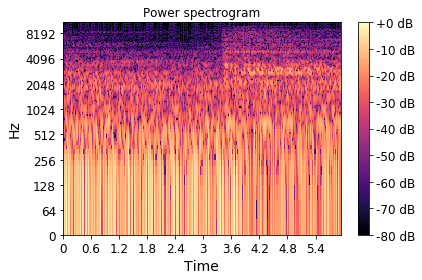

In [40]:
>>> import matplotlib.pyplot as plt
>>> import librosa.display
>>> librosa.display.specshow(librosa.amplitude_to_db(sample,
...                                                  ref=np.max),
...                          y_axis='log', x_axis='time')
>>> plt.title('Power spectrogram')
>>> plt.colorbar(format='%+2.0f dB')
>>> plt.tight_layout()

In [5]:
sample = sample[..., None]
print(sample)
print(sample.shape)

[[[ -7.20238646e-01]
  [ -5.01544944e-01]
  [  1.82757751e-01]
  ..., 
  [  1.73593716e-01]
  [  6.20198082e-01]
  [  1.67341409e+00]]

 [[  9.03699447e-01]
  [ -2.37903816e-01]
  [  1.87462273e-01]
  ..., 
  [ -7.58210044e-02]
  [  5.34895728e-01]
  [ -2.37967327e+00]]

 [[ -9.75314406e-01]
  [  2.00741397e+00]
  [ -2.09424064e+00]
  ..., 
  [ -6.07992105e-01]
  [ -8.03200562e-01]
  [  1.72705029e+00]]

 ..., 
 [[  1.12288116e-03]
  [ -1.46450065e-03]
  [ -1.83918578e-03]
  ..., 
  [  2.48685427e-03]
  [  4.15643407e-03]
  [ -1.58105725e-03]]

 [[ -1.05264864e-03]
  [ -8.77487351e-04]
  [ -1.83663915e-03]
  ..., 
  [  2.48573993e-03]
  [  3.26628623e-03]
  [  1.72389814e-03]]

 [[  1.12225790e-03]
  [ -2.90219230e-04]
  [ -1.83748116e-03]
  ..., 
  [  2.48593392e-03]
  [  2.35290024e-03]
  [ -1.58178132e-03]]]
(257, 9, 1)


In [12]:
import os
import librosa.display

# processedData_path = "preprocessedSamples_spect.data"
# processedX = np.zeros((len(X_load),256,256,1), dtype=np.float)
# processedX = np.zeros((len(X),513,9), dtype=np.float)
# processedy = np.zeros(len(y_load), dtype=np.float)

# for i in range(len(X_load)):
#     sample = librosa.core.stft(y=X_load[i], n_fft=511, hop_length=None, win_length=128, window='hamming', center=True, dtype=np.float32, pad_mode='reflect')
#     sample = np.atleast_3d(sample)
#     processedX[i] = sample
#     processedy[i] = y_load[i]
#     if i % 200 == 0:
#         print(i)


processedX = np.zeros((len(X_load),512), dtype=np.float)
#processedX = np.zeros((len(X),513,9), dtype=np.float)
processedy = np.zeros(len(y_load), dtype=np.float)

for i in range(len(X_load)):
    sample = np.array(X_load[i], dtype=np.float)
    sample = sample*np.hamming(1024)
    sample = np.abs(np.fft.rfft(sample))[1:]
#     sample = np.reshape(sample,(256,255, 1))
    sample = np.atleast_3d(sample)
#     sample = np.append(sample, y[i])
    processedX[i] = sample
    processedy[i] = y_load[i]
    if i % 1000 == 0:
        print(i)
        print(sample.shape)

ValueError: could not broadcast input array from shape (512,1) into shape (512)

In [44]:
print(processedX[0][0])
print(processedX.shape)

[[ 10.24543095]
 [  5.41173458]
 [ -4.47599697]
 [ -8.29043198]
 [ -1.69622755]
 [  6.57477665]
 [  6.05272484]
 [ -0.76499933]
 [ -4.19828749]
 [ -3.52681398]
 [ -0.20263177]
 [  3.83734989]
 [  2.28000402]
 [ -3.29323864]
 [ -3.37435555]
 [  2.90432477]
 [  6.10292435]
 [  0.95459574]
 [ -6.12441301]
 [ -6.26358223]
 [ -0.20581068]
 [  6.11344194]
 [  6.42324734]
 [ -1.22119546]
 [ -6.4508357 ]
 [ -2.0404582 ]
 [  4.07790613]
 [  3.11711359]
 [ -2.09647465]
 [ -3.85681748]
 [ -1.45064294]
 [  2.12607694]
 [  4.64069843]
 [  2.73735762]
 [ -3.58865285]
 [ -6.02396917]
 [  0.21458735]
 [  5.4287219 ]
 [  2.01347542]
 [ -3.70584822]
 [ -3.92045355]
 [  1.13310027]
 [  5.57674313]
 [  3.68773794]
 [ -3.57826567]
 [ -7.32830381]
 [ -2.2651782 ]
 [  5.66641092]
 [  6.08340406]
 [ -0.2987479 ]
 [ -3.63206911]
 [ -3.08799195]
 [ -0.85295701]
 [  2.45422268]
 [  2.18762302]
 [ -1.82319856]
 [ -3.08457279]
 [  2.19427586]
 [  6.57365751]
 [  1.16894412]
 [ -7.28720331]
 [ -6.86117458]
 [  0.53

In [7]:
from sklearn.utils import shuffle
processedX, processedy = shuffle(processedX, processedy)
print(len(processedX))

for i in range(len(processedy)):
	processedy[i] = (processedy[i]) - 1

X_train = np.array(processedX[:-50], dtype=np.float)
y_train = np.array(processedy[:-50], dtype=np.float)

X_valid = np.array(processedX[-50:-60], dtype=np.float)
y_valid = np.array(processedy[-50:-60], dtype=np.float)

X_test = np.array(processedX[-60:], dtype=np.float)
y_test = np.array(processedy[-60:], dtype=np.float)
print(y_test[1])
print(X_test[1])

print(X_train.shape,y_train.shape, X_valid.shape, y_valid.shape)

14377
24.0
[  6.47863206e-01   6.16775900e+00   1.10250275e+01   4.26924382e+00
   1.49975746e+01   4.68334990e+01   4.98157224e+01   1.28676577e+01
   1.05333856e+01   5.06509362e+00   1.76167720e+00   2.02521640e+00
   4.09319369e+00   4.36009164e-01   1.10326945e+00   1.18053192e+00
   2.43840574e+00   3.37187955e+00   2.80733565e+00   2.43463050e+00
   4.73252190e-01   4.42266309e-01   1.16612327e+00   4.71757474e-01
   7.41295712e-01   1.53838281e+00   1.87940629e+00   1.51100780e+00
   2.28122277e-01   5.55571857e-01   6.31058734e-01   3.83579598e-01
   6.42873260e-01   4.78203563e-01   3.08358311e-01   3.26258014e-01
   3.61024801e-01   4.32235365e-01   6.99535496e-02   2.97677585e-01
   9.97816899e-02   3.17006077e-01   3.02048358e-01   1.13221021e-01
   5.32006233e-01   1.15099043e-01   2.63189079e-01   1.34784684e-01
   1.32801366e-01   8.52505934e-02   1.88655232e-01   2.22590125e-01
   1.74107607e-01   1.99914584e-01   9.30451352e-02   1.92305912e-01
   3.95830974e-02   3.2

In [61]:
import tensorflow as tf

height = 256
width = 256
channels = 1
n_inputs = height * width

conv1_fmaps = 16
conv1_ksize = 5
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 32
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25

pool3_fmaps = conv2_fmaps

n_fc1 = 512
fc1_dropout_rate = 0.5

n_outputs = len(np.unique(y_train))

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 128 * 128])
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1_drop, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [48]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

In [63]:
n_epochs = 1000
batch_size = 5

best_loss_val = np.infty
check_interval = 10
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train))
        idx = 0
        print(rnd_idx)
        for rnd_indices in np.array_split(rnd_idx, len(X_train) // batch_size):
        #for idx in range(len(X_train) // batch_size):
#             print(idx)
#             X_reshaped = np.reshape(X_train[idx],(1, -1))
#             y_reshaped = np.reshape(y_train[idx],(-1))
#             print(X_reshaped.shape)
#             print(y_reshaped.shape)
            X_batch, y_batch = X_train[rnd_indices], y_train[rnd_indices]
            X_batch_reshaped = np.reshape(X_batch,(len(X_batch), -1))
            sess.run(training_op, feed_dict={X: X_batch_reshaped, y: y_batch, training: True})
            if idx % check_interval == 0:
                X_valid_reshaped = np.reshape(X_valid,(len(X_valid), -1))
                loss_val = loss.eval(feed_dict={X: X_valid_reshaped,
                                                y: y_valid})
                print(loss_val)
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
            idx += 1
        X_batch_reshaped = np.reshape(X_batch,(len(X_batch), -1))
        acc_train = accuracy.eval(feed_dict={X: X_batch_reshaped, y: y_batch})
        X_valid_reshaped = np.reshape(X_valid,(len(X_valid), -1))
        acc_val = accuracy.eval(feed_dict={X: X_valid_reshaped,
                                           y: y_valid})
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                  epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    X_test_reshaped = np.reshape(X_test,(len(X_test), -1))
    acc_test = accuracy.eval(feed_dict={X: X_test_reshaped,
                                        y: y_test})
    print("Final accuracy on test set:", acc_test)
    #save_path = saver.save(sess, "./my_mnist_model")

ResourceExhaustedError: OOM when allocating tensor with shape[524288,512]
	 [[Node: fc1/kernel/Initializer/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, _class=["loc:@fc1/kernel"], dtype=DT_FLOAT, seed=42, seed2=70, _device="/job:localhost/replica:0/task:0/gpu:0"](fc1/kernel/Initializer/random_uniform/shape)]]

Caused by op 'fc1/kernel/Initializer/random_uniform/RandomUniform', defined at:
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-61-a77af74fd243>", line 47, in <module>
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\layers\core.py", line 215, in dense
    return layer.apply(inputs)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\layers\base.py", line 492, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\layers\base.py", line 434, in __call__
    self.build(input_shapes[0])
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\layers\core.py", line 118, in build
    trainable=True)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\layers\base.py", line 374, in add_variable
    trainable=trainable and self.trainable)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1065, in get_variable
    use_resource=use_resource, custom_getter=custom_getter)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 962, in get_variable
    use_resource=use_resource, custom_getter=custom_getter)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 367, in get_variable
    validate_shape=validate_shape, use_resource=use_resource)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 352, in _true_getter
    use_resource=use_resource)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 725, in _get_single_variable
    validate_shape=validate_shape)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\variables.py", line 200, in __init__
    expected_shape=expected_shape)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\variables.py", line 278, in _init_from_args
    initial_value(), name="initial_value", dtype=dtype)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 701, in <lambda>
    shape.as_list(), dtype=dtype, partition_info=partition_info)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\init_ops.py", line 441, in __call__
    dtype, seed=self.seed)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\random_ops.py", line 236, in random_uniform
    shape, dtype, seed=seed1, seed2=seed2)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\gen_random_ops.py", line 249, in _random_uniform
    seed=seed, seed2=seed2, name=name)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[524288,512]
	 [[Node: fc1/kernel/Initializer/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, _class=["loc:@fc1/kernel"], dtype=DT_FLOAT, seed=42, seed2=70, _device="/job:localhost/replica:0/task:0/gpu:0"](fc1/kernel/Initializer/random_uniform/shape)]]


Got 0.25 on this model.... next try:

## Second CNN



In [6]:
import os
import librosa.display

processedData_path = "preprocessedSamples_spect.data"
processedX = np.zeros((len(X_load),256,16,1), dtype=np.float)
processedy = np.zeros(len(y_load), dtype=np.float)

for i in range(len(X_load)):
    sample = librosa.core.stft(y=X_load[i], n_fft=511, hop_length=None, win_length=256, window='hamming', center=True, dtype=np.float32, pad_mode='reflect')
    sample = np.atleast_3d(sample)
    processedX[i] = sample
    processedy[i] = y_load[i]

print(processedX[0].shape)

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\librosa\core\spectrum.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]].conj()


(256, 16, 1)


In [7]:
from sklearn.utils import shuffle
shufled_processedX, shufled_processedy = shuffle(processedX, processedy)

for i in range(len(shufled_processedy)):
	shufled_processedy[i] = (shufled_processedy[i]) - 1

X_train = np.array(shufled_processedX[:-2000], dtype=np.float)
y_train = np.array(shufled_processedy[:-2000], dtype=np.float)

X_valid = np.array(shufled_processedX[-2000:-1000], dtype=np.float)
y_valid = np.array(shufled_processedy[-2000:-1000], dtype=np.float)

X_test = np.array(shufled_processedX[-1000:], dtype=np.float)
y_test = np.array(shufled_processedy[-1000:], dtype=np.float)
print(y_test[999])
print(X_test[999])

print(X_train.shape,y_train.shape, X_valid.shape, y_valid.shape)

n_outputs = len(np.unique(shufled_processedy))
print(np.unique(shufled_processedy))
n_outputs

8.0
[[[ -3.23619366e+00]
  [  1.16145933e+00]
  [  1.21057081e+00]
  ..., 
  [  8.59650016e-01]
  [  4.54807669e-01]
  [ -1.19688570e+00]]

 [[  4.64826250e+00]
  [ -2.10059786e+00]
  [ -1.34036231e+00]
  ..., 
  [ -2.12062287e+00]
  [ -6.82256743e-02]
  [  1.45642459e+00]]

 [[ -6.66698265e+00]
  [  3.38708758e+00]
  [  1.96856248e+00]
  ..., 
  [  5.07859612e+00]
  [ -1.27503741e+00]
  [ -1.46690404e+00]]

 ..., 
 [[  7.42667494e-03]
  [ -4.38474258e-03]
  [  4.27595153e-03]
  ..., 
  [  1.88071874e-03]
  [ -2.20070337e-03]
  [  1.06912935e-02]]

 [[  7.41749862e-03]
  [ -7.36583082e-04]
  [  4.51048696e-03]
  ..., 
  [  1.76071131e-03]
  [ -1.98100437e-03]
  [ -1.39174249e-03]]

 [[ -7.44780758e-03]
  [  1.76233775e-03]
  [ -4.39368002e-03]
  ..., 
  [ -1.82072457e-03]
  [  2.09195470e-03]
  [ -2.17995001e-03]]]
(12377, 256, 16, 1) (12377,) (1000, 256, 16, 1) (1000,)
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22. 

48

In [4]:
import tensorflow as tf
import numpy as np

height = 256
width = 16
channels = 1
n_inputs = height * width
n_outputs = 48

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')

#input: [batch_size, 32, 3, 1]
#output: [batch_size, 32, 3, 32]
conv1_fmaps = 32 #filters
conv1_ksize = [32,3]
conv1_stride = 1
conv1_pad = "SAME"
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")

#input: [batch_size, 32, 3, 32]
#output: [batch_size, 16, 2, 32]
pool1_fmaps = conv1_fmaps
with tf.name_scope("pool1"):
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 16, 3, 1], strides=[1, 48, 2, 1], padding="VALID")
    

#input: [batch_size, 16, 2, 32]
#output: [batch_size, 16, 2, 64]
conv2_fmaps = 64
conv2_ksize = [16,2]
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25
conv2 = tf.layers.conv2d(pool1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

#input: [batch_size, 16, 2, 64]
#output1: [batch_size, 8, 1, 64]
#output2: [batch_size, 8 * 1 * 64]
pool2_fmaps = conv2_fmaps
with tf.name_scope("pool2"):
    pool2 = tf.nn.max_pool(conv2, ksize=[1, 16, 1, 1], strides=[1, 16, 1, 1], padding="VALID")
    pool2_flat = tf.reshape(pool2, shape=[-1, 8 * 1 * pool2_fmaps])
    pool2_flat_drop = tf.layers.dropout(pool2_flat, conv2_dropout_rate, training=training)

n_fc1 = 512
fc1_dropout_rate = 0.4
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool2_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1_drop, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

ValueError: Negative dimension size caused by subtracting 16 from 6 for 'pool2/MaxPool' (op: 'MaxPool') with input shapes: [?,6,7,64].

In [13]:
n_epochs = 1000
batch_size = 40

best_loss_val = np.infty
check_interval = 10
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train))
        idx = 0
        for rnd_indices in np.array_split(rnd_idx, len(X_train) // batch_size):
        #for idx in range(len(X_train) // batch_size):
#             print(idx)
#             X_reshaped = np.reshape(X_train[idx],(1, -1))
#             y_reshaped = np.reshape(y_train[idx],(-1))
#             print(X_reshaped.shape)
#             print(y_reshaped.shape)
            print(len(rnd_indices))
            X_batch, y_batch = X_train[rnd_indices], y_train[rnd_indices].astype(int)
            print(y_batch.shape)
            X_batch_reshaped = np.reshape(X_batch,(len(X_batch), -1))
            y_batch_reshaped = np.reshape(y_batch,(-1))
            sess.run(training_op, feed_dict={X: X_batch_reshaped, y: y_batch_reshaped, training: True})
            print('ohyes')
            if idx % check_interval == 0:
                X_valid_reshaped = np.reshape(X_valid,(len(X_valid), -1))
                loss_val = loss.eval(feed_dict={X: X_valid_reshaped,
                                                y: y_valid})
                print(loss_val)
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
            idx += 1
        X_batch_reshaped = np.reshape(X_batch,(len(X_batch), -1))
        acc_train = accuracy.eval(feed_dict={X: X_batch_reshaped, y: y_batch})
        X_valid_reshaped = np.reshape(X_valid,(len(X_valid), -1))
        acc_val = accuracy.eval(feed_dict={X: X_valid_reshaped,
                                           y: y_valid})
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                  epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    X_test_reshaped = np.reshape(X_test,(len(X_test), -1))
    acc_test = accuracy.eval(feed_dict={X: X_test_reshaped,
                                        y: y_test})
    print("Final accuracy on test set:", acc_test)
    #save_path = saver.save(sess, "./my_mnist_model")

41
(41,)


InvalidArgumentError: logits and labels must have the same first dimension, got logits shape [328,48] and labels shape [41]
	 [[Node: train/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT32, _device="/job:localhost/replica:0/task:0/gpu:0"](output/output/BiasAdd, _arg_inputs/y_0_2/_13)]]

Caused by op 'train/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits', defined at:
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-9d6670af9c36>", line 65, in <module>
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1690, in sparse_softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 2486, in _sparse_softmax_cross_entropy_with_logits
    features=features, labels=labels, name=name)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): logits and labels must have the same first dimension, got logits shape [328,48] and labels shape [41]
	 [[Node: train/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT32, _device="/job:localhost/replica:0/task:0/gpu:0"](output/output/BiasAdd, _arg_inputs/y_0_2/_13)]]
